# Analisis de posibilidad de join entre datos sernapesca

### Import libreries

In [12]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import contextily as cx

In [16]:
%%time
existencias = pd.read_excel("../data/datos_sernapesca/centros_existencias/.shp")


CPU times: total: 41.9 s
Wall time: 41.9 s


### Filtrando por región y tipo de producto

In [13]:
file = os.listdir("../data/datos_sernapesca/Shp Cierres Marea Roja")

path = [os.path.join("../data/datos_sernapesca/Shp Cierres Marea Roja", i) for i in file if ".shp" in i]

cierres_concat = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)

In [20]:
gpd.read_file(path[0]).crs

<Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - 78°W to 72°W - by country
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

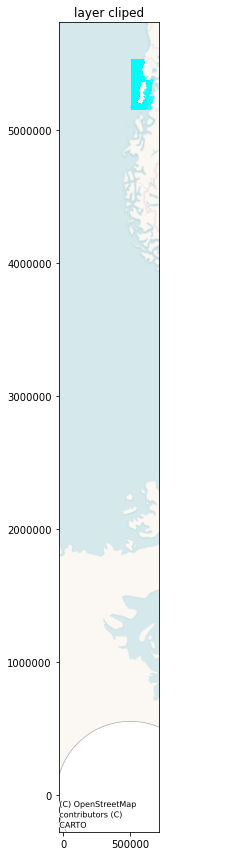

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
cierres_concat.plot(color='cyan',ax=ax,  alpha=0.4)
ax.ticklabel_format(style='plain')
ax.set_title('layer cliped')
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager, crs=gpd.read_file(path[0]).crs)
plt.tight_layout()
plt.show()

In [27]:
export_geojson = '../data/GIS/intermedios/cierres_concat.geojson'
cierres_concat.to_file(export_geojson, driver='GeoJSON')

In [ ]:
cierres_ = pointdf.sjoin(polydf, how="right")
join_right_df

Se tienen 3 datasets y queremos saber si es que es posible hacer join entre los 3. Para esto y en primera instancia es necesario definir los campos que podrían ser utilizados para el join. 

* Por parte de la tabla de ingresos, código de agente parece ser una buena opción y también código del último proovedor.

* Para el caso de la tabla de reportes, existe el codigo de centro y el codigo de origen, los cuales podrían servir.

* Finalmente la tabbla de RNA contiene el código del centro de cultivo acuícola.

In [23]:
#ingresos_filtered

RNA_list_CCAA = RNA_filtered['Codigo Centro'].unique().tolist()
reporte_plantas_list_origen = reporte_plantas_filtered['Código Origen'].unique().tolist()

In [51]:
results = {}
for i in RNA_list_CCAA:
    results[i] = reporte_plantas_list_origen.count(i) 

In [52]:
df_RNA_reporte_plantas = pd.DataFrame.from_dict(results,orient='index', columns=['count'])
#type(df_RNA_reporte_plantas['count'])
ccaa_match_with_reporte = df_RNA_reporte_plantas[df_RNA_reporte_plantas['count'] > 0]
ccaa_match_with_reporte


,count
100022,1
100242,1
100339,1
101000,1
101011,1
...,...
104342,1
104347,1
104349,1
104366,1
